# CONCEPTS 1

##### Deep learning
One of the machine learning technique that learns features directly from data.
##### Deep Learning vs Machine Learning
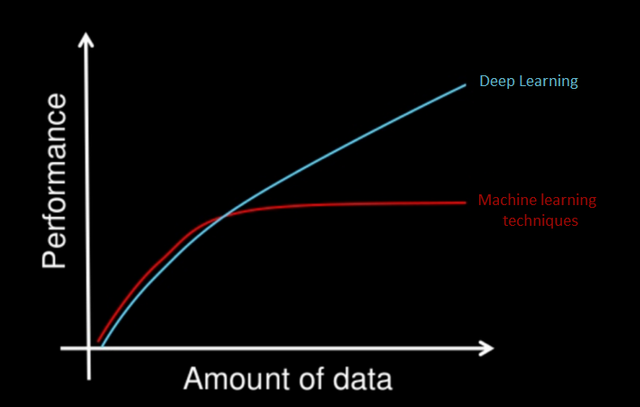

### Code Part 1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
X = np.load('Sign-language-digits-dataset/X.npy')
y = np.load('Sign-language-digits-dataset/Y.npy')

We will using only sign 0 and 1.

Looking at the dataset description, we can see sign zeros is between indexes 204 and 408, while sign one is between indexes 822 n 1027.

(-0.5, 63.5, 63.5, -0.5)

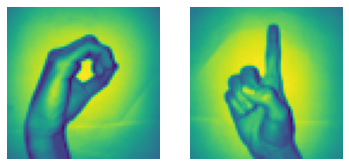

In [3]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X[900].reshape(img_size, img_size))
plt.axis('off')

In [4]:
# Joining a sequence of arrays along a row axis (sign 0 and sign 1)

X_01 = np.concatenate((X[204:409], X[822:1027] ), axis=0)
z = np.zeros(int(X_01.shape[0]/2))
o = np.ones(int(X_01.shape[0]/2))
y_01 = np.concatenate((z, o), axis=0).reshape(X_01.shape[0],1)

print("X shape: " , X_01.shape)
print("Y shape: " , y_01.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


The shape of the X is (410, 64, 64)
410 means that we have 410 images (zero and one signs)
64 means that our image size is 64x64 (64x64 pixels)

In [5]:
# Split into trainset and testset

X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, test_size = 0.2, random_state = 42)

In [6]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

    We need to transform a 3D array into a 2D array to use as input for deep learning model, so we will flatten X array

In [7]:
X_train = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

print("X train flatten",X_train.shape)
print("X test flatten",X_test.shape)

X train flatten (328, 4096)
X test flatten (82, 4096)


In [8]:
# Transpose

X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# CONCEPTS 2

We will use Logistic Regression, because we are work about binary classification (0 and 1 only)

Computer graphic of Logistic regression model:
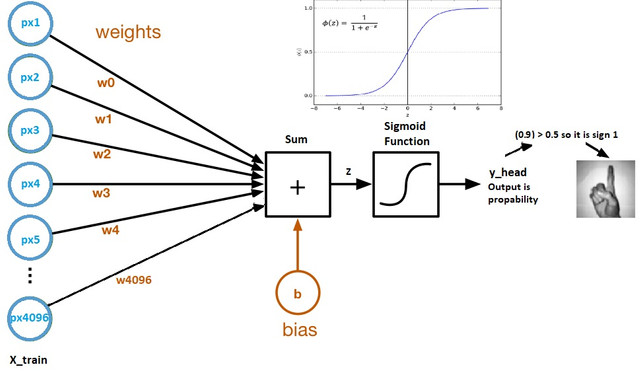

##### Parameters are weight and bias.
Weights: coefficients of each pixels

Bias: intercept

z = (w.t)x + b => z equals to (transpose of weights times input x) + `bias =>  b + px1w1 + px2w2 + ... + px4096*w4096`

y_head = sigmoid(z)

Sigmoid function makes z between zero and one so that is probability. You can see sigmoid function in computation graph.

##### Why we use sigmoid function?
It gives `probabilistic result`

It is derivative so we can use it in gradient descent algorithm (we will see as soon.)

##### Forward Propagation
The all steps from pixels to cost is called forward propagation

We will use this equation: `z = (w.T)x + b`, and we put this results in sigmoid function that returns a probability AND we need calcute loss(error) function

##### Gradient Descent
This technique learn the parameters weights and bias that minimize the cost function

# || LOGIC BEHIND SIMPLE NEURAL NETWORK(LOGISTIC REGRESSION) ||
### Code Part 2

In [9]:
# Initiating weighting variables (w) and bias variables (b)
# w = np.full((X_train.shape[1],1),0.01)
# b = 0.0

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [10]:
# calculation of z
# z = (w.T)x + b ==> z = np.dot(w.T,x_train)+b

# The sigmoid method is very important and will be used throughout this code 
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head #probability

def loss_meth(z, y_train):
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    return loss #error

In [11]:
# Forward Propagation Main

def forward_propagation(w,b,X_train,y_train):
    z = np.dot(w.T,X_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = loss_meth(z, y_train)
    cost = (np.sum(loss))/X_train.shape[1]      # x_train.shape[1] is for scaling
    return cost #summation of loss functions

In [12]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation

def forward_backward_propagation(w,b,X_train,y_train):
    # forward propagation
    z = np.dot(w.T,X_train) + b
    y_head = sigmoid(z)
    loss = loss_meth(z, y_train)
    cost = (np.sum(loss))/X_train.shape[1]      # x_train.shape[1] is for scaling
    # backward propagation
    derivative_weight = (np.dot(X_train,((y_head-y_train).T)))/X_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/X_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [13]:
# Updating(learning) parameters
def update(w, b, X_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,X_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [14]:
# Prediction method
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 13.819253
Cost after iteration 10: 2.624303
Cost after iteration 20: 2.733530
Cost after iteration 30: 2.530376
Cost after iteration 40: 2.302104
Cost after iteration 50: 2.065260
Cost after iteration 60: 1.828921
Cost after iteration 70: 1.592636
Cost after iteration 80: 1.347076
Cost after iteration 90: 1.082969
Cost after iteration 100: 0.796670
Cost after iteration 110: 0.504454
Cost after iteration 120: 0.285254
Cost after iteration 130: 0.212248
Cost after iteration 140: 0.199286


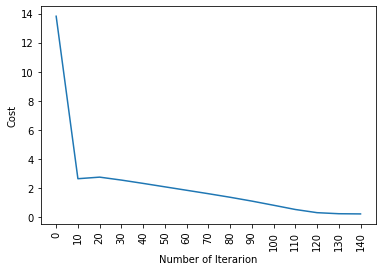

train accuracy: 92.07317073170732 %
test accuracy: 93.90243902439025 %


In [16]:
# Now, we go lets put them al together:
def logistic_regression(X_train, y_train, X_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  X_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, X_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],X_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(X_train, y_train, X_test, y_test,learning_rate = 0.01, num_iterations = 150)

# || END LOGIC ||

#  

# EVERYTHING SUMMATES THIS:

In [17]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(X_train.T, y_train.T).score(X_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(X_train.T, y_train.T).score(X_train.T, y_train.T)))

test accuracy: 0.975609756097561 
train accuracy: 1.0 
